## Ejercicios

In [1]:
from itertools import product

from fractions import Fraction

### Ejercicios:

1.- En un salón de clases hay $60$ alumnos. $30$ de los alumnos estudian francés, $35$ estudian ruso y $5$ estudian francés y ruso. Dibuja un diagrama de Venn y calcula la probabilidad de que si se elige un estudiante al azar, éste estudie solamente francés.

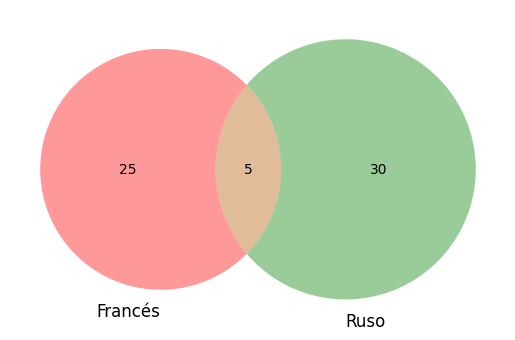

In [2]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

venn2(subsets = (25, 30, 5), set_labels = ('Francés', 'Ruso'))

In [3]:
print("La probabilidad de que un alumno estudie solo francés:"  + "25/60" )

La probabilidad de que un alumno estudie solo francés:25/60


2.- Se lanza un dado 3 veces.
    
 - Describe al espacio muestral.
    
 - Calcula la probabilidad de que salga la cara 1 en el primer lanzamiento.
    
  - Calcula la probabilidad condicional del evento cae un número par en los tres lanzamientos dado que en el primer lanzamiento cae 2.
    
    Consideremos el evento: "se obtiene sol en el segundo lanzamiento". ¿Tal evento es independiente de los eventos anteriores?

In [4]:
Omega_dado3 = set(product([1,2,3,4,5,6], repeat =3))

In [5]:
def P(E, Omega):
    return Fraction(len(E & Omega), len(Omega))

In [6]:
E_1 = {om for om in Omega_dado3 if om[0]==1}

P(E_1, Omega_dado3)

Fraction(1, 6)

In [7]:
E_2  = {om for om in Omega_dado3 if om[0]==2}

Par = { om for om in E_2 if om[1]%2 == 0 and om[2]%2 == 0}

P(Par, E_2)

Fraction(1, 4)

In [8]:
def indep(E, F):
    return P(E & F, E_2)==P(E, Omega_volado)*P(F, Omega_dado3)

In [9]:
Omega_volado = set(product(["a","s"], repeat =3))

S_2 = {om for om in Omega_volado if om[1]=="s" }

P(S_2, Omega_volado)

Fraction(1, 2)

In [10]:
indep(S_2, E_1)

False

3.- Considera el experimento: Alicia y Karla lanzan $2$ dados justos. Se tiene el siguiente juego:

   - Si la suma de los dados es par, Alicia gana la cantidad máxima que sale en las caras y Karla pierde la cantidad mínima que sale en las caras.
     
   - Si la suma de los dados es un número impar, Karla gana la cantidad de $\$ 5$ y Alicia pierde la cantidad de $\$3$.
     
¿Quién tiene más probabilidad de obtener mayor ganancia?

In [11]:
Omega_dado2 = set(product([1,2,3,4,5,6], repeat =2))

Par = {om for om in Omega_dado2 if (om[0]+om[1])%2==0}

In [12]:
def Alicia(n):
    
    A_n = { om for om in Omega_dado2 if (om[0]+om[1])%2==0 and max(om)==n}
    
    return A_n

In [13]:
G_A = sum([i*P(Alicia(i), Par) for i in range(1, 7)])

G_A

Fraction(79, 18)

In [14]:
def Karla(n):
    
    K_n = { om for om in Omega_dado2 if (om[0]+om[1])%2==0 and min(om)==n}
    
    return K_n

In [15]:
G_K = sum([i*P(Karla(i), Par) for i in range(1, 7)])

G_K

Fraction(47, 18)

In [16]:
Impar = {om for om in Omega_dado2 if (om[0]+om[1])%2==1}

In [17]:
G_K = 5*P(Impar, Omega_dado2)

G_K

Fraction(5, 2)

In [18]:
G_A = 3*P(Impar, Omega_dado2)

G_A

Fraction(3, 2)

4.- Escribe en un `DataFrame` la distribución asociada a la suma que se obtiene al lanzar $3$ dados. 

In [19]:
S = {om : om[0]+om[1]+om[2] for om in Omega_dado3} 

from collections import defaultdict

dS = defaultdict(set)

for i, j in S.items():
        
    dS[j].add(i)
    

In [21]:
import pandas as pd 
distS = {i : P(A, Omega_dado3) for i, A in dS.items() }

dist_S = pd.Series(distS)
dist_S.sort_index()

3      1/216
4       1/72
5       1/36
6      5/108
7       5/72
8       7/72
9     25/216
10       1/8
11       1/8
12    25/216
13      7/72
14      5/72
15     5/108
16      1/36
17      1/72
18     1/216
dtype: object